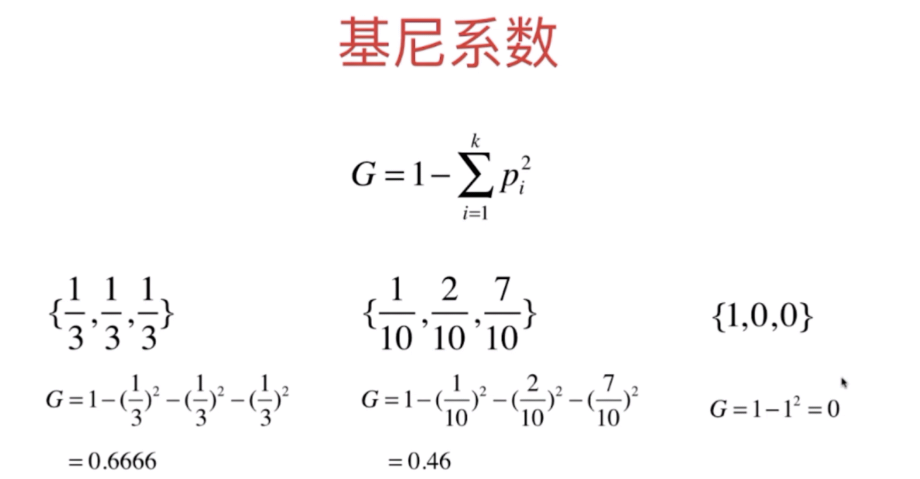

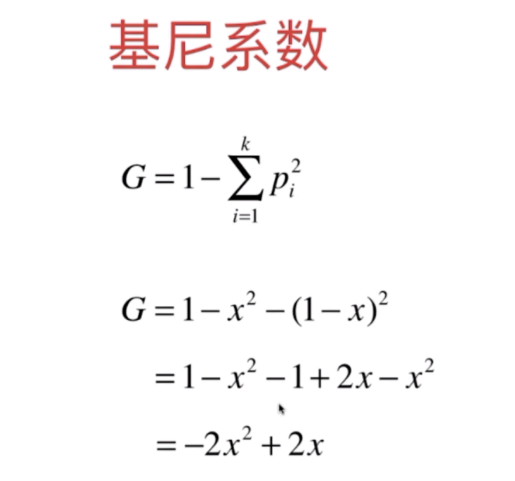

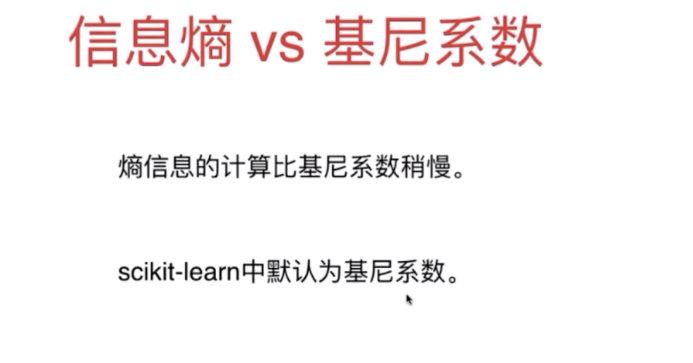

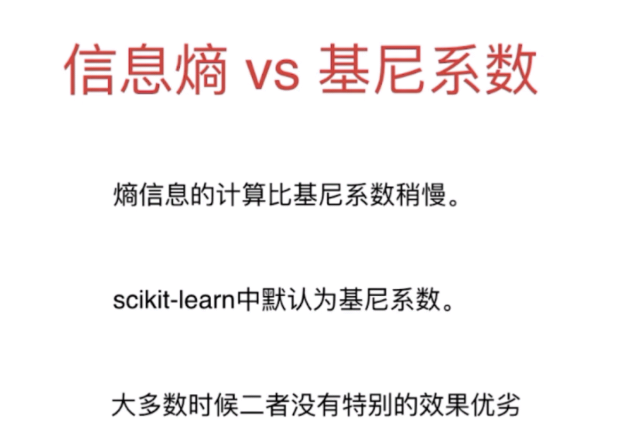

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [17]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*200)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*200)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)



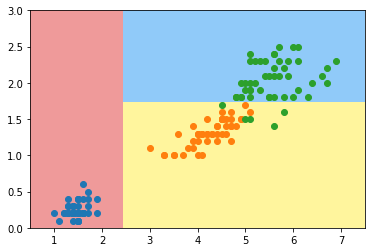

In [18]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

### 模拟使用基尼系数划分

In [19]:
def split(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] >= value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

In [28]:
from collections import Counter


def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res += -p**2
    return res    
    
    
def try_split(X, y):
    best_gini = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
          if(X[sorted_index[i-1], d] != X[sorted_index[i], d]):
            v = (X[sorted_index[i-1], d] + X[sorted_index[i], d])/2
            X_l, X_r, y_l, y_r = split(X, y, d, v)
            g = gini(y_l) + gini(y_r)
            if g < best_gini:
                best_gini, best_d, best_v = g, d, v
    return best_gini, best_d, best_v

best_gini, best_d, best_v = try_split(X, y)

print("best_gini  =", best_gini)
print("best_d  =", best_d)
print("best_v  =", best_v)

best_gini  = 0.5
best_d  = 0
best_v  = 2.45


In [29]:
X1_l, X1_r, y1_l, y1_r  = split(X, y, best_d, best_v)

In [30]:
gini(y1_l)

0.0

In [31]:
gini(y1_r)

0.5

In [36]:
best2_gini, best2_d, best2_v  = try_split(X1_r, y1_r)

print("best2_gini  =", best2_gini)
print("best2_d  =", best2_d)
print("best2_v  =", best2_v)

bes2t_gini  = 0.2105714900645938
best2_d  = 1
best2_v  = 1.75


In [37]:
X2_l, X2_r, y2_l, y2_r  = split(X1_r, y1_r, best2_d, best2_v)

In [38]:
gini(y2_l)

0.1680384087791495

In [39]:
gini(y2_r)

0.04253308128544431